In [1]:
import matplotlib.pyplot as plt
import os, sys

from astropy.io import fits
from astropy.table import Table

import numpy as np

import matplotlib.colors as colors
from astropy.visualization import imshow_norm, MinMaxInterval, LogStretch,PercentileInterval, ImageNormalize

import sep
sys.path.append(os.path.expanduser('~/repos/ReipurthBallyProject/src'))


In [2]:
from catalog import *
import sep
from r_d_src.img_find_objects import find_stars

# Object Catalogs

### FrameID: '2014_02_18_HST_sum_F164N' and '2016_02_03_HST_sum_F164N'

In [3]:
obsdir = '/home/kevin/Documents/HH24'
frameid = '2016_02_03_HST_sum_F164N'
#frameid = '2014_02_18_HST_sum_F164N'
#use the registered images
with fits.open(os.path.join(obsdir,'registered', frameid+'.fits')) as f:
    print(f'Length: {len(f)}')
    for i,hdr in enumerate(f):
        xt = hdr.header.pop('XTENSION','Unknown')
        xn = hdr.header.pop('EXTNAME', 'Unknown')
        rn = hdr.header.pop('ROOTNAME', 'Unknown')
        radesys = hdr.header.pop('RADESYS', 'Unknown')
        print(f'Index: {i}, Extension: {xt}, Rootname: {rn}, Extname: {xn}, RADESYS: {radesys}')
    hdr = f[0].header.copy()
    img = f[0].data.copy()

Length: 1
Index: 0, Extension: Unknown, Rootname: icuj01ugq, Extname: Unknown, RADESYS: ICRS


In [ ]:
regout = os.path.join(obsdir,'objcat', frameid+'.xml')

# to prevent inadvertant overwriting of the master catalog:

find_stars(frameid, hdr, img, regout,byteswap=True, thresh=25)

2016_02_03_HST_sum_F164N: Number of objects identified: 46


thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,errx2,erry2,errxy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
0.1337929666042328,134,108,637,654,18,31,644.7179870733737,22.707608353339296,20.585997329861527,11.957369935204191,-0.7435294227162643,0.00020745403058454288,0.0001231147748229552,-9.01593809985269e-06,4.544182777404785,3.4487342834472656,-0.08533184230327606,0.04868605360388756,0.08381868153810501,0.006054761819541454,19.58020782470703,20.00737190246582,0.21759629249572754,0.5135279893875122,639,21,638,21,1
0.1337929666042328,5,5,492,493,248,250,492.3796142741156,249.2097050571209,0.23550727700329113,0.5060881421116614,0.09369128203908045,5.35999480517866e-05,0.00012487135675780822,2.6709539216769574e-05,0.731684684753418,0.45412880182266235,1.2679523229599,4.583742141723633,2.1330368518829346,-1.6971615552902222,0.8014517426490784,1.0320699214935303,0.19524942338466644,0.3386044502258301,492,249,492,249,0
0.1337929666042328,39,38,838,843,372,380,840.5246619728291,374.6123363024052,2.1117183214586728,4.021345910836285,-1.0012947387921054,3.678979135522605e-05,7.515789052877332e-05,-1.945016339584136e-05,2.1095261573791504,1.2972910404205322,-1.1662185192108154,0.5369412899017334,0.281962513923645,0.2673913240432739,8.846983909606934,9.210260391235352,0.4517194330692291,0.6203218102455139,841,374,841,374,1
0.1337929666042328,21,19,839,843,380,385,841.1062055595378,382.8725423198812,1.1874217273824677,2.290914401909804,0.5870710770337979,5.3877923443925886e-05,9.729558222972756e-05,2.6657906201407627e-05,1.5952495336532593,0.9661859273910522,1.1625927686691284,0.964340090751648,0.49983465671539307,-0.4942447245121002,3.9237844944000244,4.17617654800415,0.25326991081237793,0.303085595369339,841,383,841,383,1
0.1337929666042328,40,37,812,818,405,411,815.1451893004718,407.9169840327584,2.756932445666008,2.764314089808545,-0.3627661569668561,5.766723678833918e-05,5.996130962554089e-05,-8.279495526187936e-06,1.7673166990280151,1.5484955310821533,-0.7904850244522095,0.36909550428390503,0.36810988187789917,0.09687419980764389,7.878347873687744,8.176263809204102,0.2895991802215576,0.3206118643283844,816,408,816,408,0
0.1337929666042328,249,240,794,815,415,429,802.1978309485787,422.9809016124245,27.897247564610893,11.374294441286118,-0.29083609172346314,4.751052879844289e-05,2.019009255956937e-05,-5.211046460414301e-07,5.28226900100708,3.3718209266662598,-0.017594678327441216,0.03585538640618324,0.08794098347425461,0.001833615475334227,70.56334686279297,71.42487335205078,0.690712571144104,0.831968367099762,798,425,799,425,0
0.1337929666042328,69,64,638,645,424,438,641.4035471649779,429.5592871017511,3.329673052606381,12.922272793019715,4.06348590504615,4.817410882684201e-05,0.00018529073009453865,5.911842248126715e-05,3.796337842941284,1.3563793897628784,1.2193595170974731,0.48735660314559937,0.12557683885097504,-0.30650439858436584,12.39228343963623,12.65707778930664,0.2891733646392822,0.3150154948234558,641,428,641,428,1
0.1337929666042328,101,98,645,654,434,451,650.1010503213711,442.57328446218827,5.732693751236688,17.37155430603056,6.053027155498903,6.208082913377016e-05,0.00018163047318350988,6.326318802987671e-05,4.4664130210876465,1.7763457298278809,1.1682606935501099,0.2759726047515869,0.09107223898172379,-0.19232241809368134,16.860572814941406,17.20258140563965,0.212347611784935,0.24754643440246582,648,437,648,437,1
0.1337929666042328,15,12,544,548,533,536,545.8670477723605,534.305887013618,0.9113812498899185,0.8491519491388733,-0.03712327687326589,2.4308646126021656e-05,1.9858870031849318e-05,-1.3151129393951035e-06,0.9636933207511902,0.9120462536811829,-0.4366128444671631,1.0991930961608887,1.179746389389038,0.09610918164253235,4.82184362411499,5.3647565841674805,0.6575

### FrameID: '2009_10_13_HST_F160W'

This frame is 0-padded much to the chagrin of the object extractor. Therefore in the code below, we replace all of the zeros in the image with `np.nan`.

In [95]:
obsdir = '/home/kevin/Documents/HH24'
#frameid = '2016_02_03_HST_sum_F164N'
#frameid = '2014_02_18_HST_sum_F164N'
frameid = '2009_10_13_HST_F160W'
with fits.open(os.path.join(obsdir,'registered', frameid+'.fits')) as f:
    print(f'Length: {len(f)}')
    for i,hdr in enumerate(f):
        xt = hdr.header.pop('XTENSION','Unknown')
        xn = hdr.header.pop('EXTNAME', 'Unknown')
        rn = hdr.header.pop('ROOTNAME', 'Unknown')
        radesys = hdr.header.pop('RADESYS', 'Unknown')
        print(f'Index: {i}, Extension: {xt}, Rootname: {rn}, Extname: {xn}, RADESYS: {radesys}')
    hdr = f[0].header.copy()
    img = f[0].data.copy()
    img = np.where(img != 0, img, np.nan)

Length: 1
Index: 0, Extension: Unknown, Rootname: hst_11548_9u_wfc3_ir_f160w_run_1, Extname: Unknown, RADESYS: ICRS


In [101]:
regout = os.path.join(obsdir,'objcat', frameid+'_new_05.xml')
find_stars(frameid, hdr, img, regout,byteswap=False, thresh=5)

2009_10_13_HST_F160W: Number of objects identified: 96


thresh,npix,tnpix,xmin,xmax,ymin,ymax,x,y,x2,y2,xy,errx2,erry2,errxy,a,b,theta,cxx,cyy,cxy,cflux,flux,cpeak,peak,xcpeak,ycpeak,xpeak,ypeak,flag
float64,int64,int64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,int64,int64,int64,int64,int64
0.11856848001480103,36,33,1333,1345,77,84,1338.8867187708386,79.11577954522673,6.923384039292429,4.407493897688383,2.3111009251306314,0.004672521147414325,0.0029449881521110117,0.0015284453511374917,2.880401849746704,1.7418849468231201,0.5361678004264832,0.17508406937122345,0.27502575516700745,-0.18361316621303558,5.912142753601074,6.191319465637207,0.2996825575828552,0.3181847333908081,1338,77,1338,77,1
0.11856848001480103,10,10,1455,1458,227,230,1456.369491497483,228.26465945093122,0.8056838654591152,1.1424419507580008,0.5412009743828878,0.002572250644268105,0.0037049850228064378,0.0017774099807737942,1.2413105964660645,0.6381800174713135,0.9362122416496277,1.8204838037490845,1.2838590145111084,-1.7248098850250244,1.3558846712112427,1.5055485963821411,0.15934890508651733,0.18013983964920044,1456,228,1456,228,0
0.11856848001480103,84,72,1503,1513,403,413,1508.3327156234297,407.9467789965944,2.824129593956762,2.986465410515045,-0.0732819485512124,4.05074026514964e-05,4.3211272238710196e-05,-4.0431255245326183e-07,1.7362754344940186,1.672107219696045,-1.2036043405532837,0.3543170094490051,0.3350573182106018,0.01738847605884075,87.06234741210938,87.41521453857422,5.3187408447265625,7.230861663818359,1508,408,1508,408,0
0.11856848001480103,304,294,1094,1114,394,418,1104.5687923390788,403.9154514484349,26.672958431706178,26.456861048207912,11.578876503986706,0.001860636786856156,0.001938099943619589,0.0008071148137222798,6.1761064529418945,3.871114730834961,0.7807325124740601,0.046284619718790054,0.046662669628858566,-0.04051303490996361,52.037296295166016,52.471099853515625,0.2576295733451843,0.27092158794403076,1101,403,1099,402,0
0.11856848001480103,114,98,1159,1169,407,422,1163.5347210464042,412.47632766685206,2.811343952288631,4.201020200025553,0.060081112700327566,3.321780855351126e-05,8.120630016101447e-05,5.3254252144718e-06,2.050271511077881,1.6759330034255981,1.5276696681976318,0.3558105230331421,0.23811019957065582,-0.01017728541046381,113.36577606201172,113.92727661132812,7.912165641784668,13.385345458984375,1163,412,1163,412,0
0.11856848001480103,47,41,1343,1350,479,486,1346.395339714878,482.52871063153395,1.8344979041058789,2.1003431501041305,-0.04404449238732866,0.000112282087289798,0.0001331083261735784,-3.9618997849866e-06,1.451706051826477,1.3518102169036865,-1.4108121395111084,0.5453828573226929,0.4763525128364563,0.022873511537909508,28.47971534729004,29.222305297851562,2.3028297424316406,3.6495633125305176,1346,483,1346,483,0
0.11856848001480103,580,501,695,735,439,492,720.6359582955689,471.627524006672,41.45560539954931,130.3284139340326,26.746893795135975,0.0023667909724536073,0.007361550379063064,0.0014931398490477172,11.736998558044434,5.833257675170898,1.299883484840393,0.027803709730505943,0.008843962103128433,-0.011412137188017368,77.24036407470703,78.77003479003906,0.177507221698761,0.24926424026489258,715,459,715,459,1
0.11856848001480103,24859,24331,1144,1394,67,405,1250.78461960171,207.62054691244748,1533.5815263889963,3493.9311260800387,340.1860911255735,0.0002832549661703459,0.0005745749474759746,6.080088634589799e-05,59.592674255371094,38.421688079833984,1.4037666320800781,0.0006664625834673643,0.0002925285662058741,-0.00012978006270714104,12781.6318359375,12801.2236328125,14.316102981567383,21.93584442138672,1359,241,1358,241,1
0.11856848001480103,45456,44944,891,1209,85,511,1075.6920197047275,193.57920272595118,1028.5634958787414,1273.887289184153,-446.07922323535604,2.735071429222536e-06,6.395659060228377e-06,-3.0071216247494993e-06,40.17290115356445,26.240976333618164,-0.9195709824562073,0.0011463167611509562,0.0009255603654310107,0.0008

#### Hand-edits to 2009_10_13_HST_F160W

At $thresh=5$ we get the objects we need; however the centroid for `obj-0064` appears to be misplaced.
At $thresh=15$, the centroid appears to be better placed, in this scheme, the `objid` is `obj-0053`.
So we'll use `topcat` to edit $thresh=5$ file and insert the values from the $thresh=15$ and retain the `obj-0064` label.

### frameid = '2024_03_15_F164N'

In [5]:
obsdir = '/home/kevin/Documents/HH24'
frameid = '2024_03_15_F164N'
with fits.open(os.path.join(obsdir,'lucy-richardson', frameid+'_lr15.fits')) as f:
#with fits.open(os.path.join(obsdir,'lucy-richardson', frameid+'_lr15.fits')) as f:
    print(f'Length: {len(f)}')
    for i,hdr in enumerate(f):
        xt = hdr.header.pop('XTENSION','Unknown')
        xn = hdr.header.pop('EXTNAME', 'Unknown')
        rn = hdr.header.pop('ROOTNAME', 'Unknown')
        radesys = hdr.header.pop('RADESYS', 'Unknown')
        print(f'Index: {i}, Extension: {xt}, Rootname: {rn}, Extname: {xn}, RADESYS: {radesys}')
    hdr = f[0].header.copy()
    img = f[0].data.copy()

Length: 1
Index: 0, Extension: Unknown, Rootname: Unknown, Extname: Unknown, RADESYS: ICRS


In [4]:
sep.get_extract_pixstack()

300000

In [4]:
sep.set_extract_pixstack(1000000)

In [21]:
regout = os.path.join(obsdir,'sex-test', frameid+'_conv_lr15.xml')
#if not os.path.exists(regout):
zz=find_stars(frameid, hdr, img, regout,byteswap=True, thresh=5,
            deblend_cont=0.000001,
            deblend_nthresh=16)

2024_03_15_F164N: Number of objects identified: 2240


In [31]:
sys.path.append('/home/kevin/repos/miscstat')


## Measuring Velocity

Methodolgy:
1.  objects from each image cataloged in directory `objcat`
    1. JWST image from all_fits (the original)
    1. JWST catalog entries marked for inclusion/exclusion
    2. HST images from registered_images (registered against the JWST)
    3. See cells above for object extraction
1.  use `topcat` to match HST catalog (right side of join) to JWST catalog (join left side)
    1. max separation 1"
    1. inner join will result in small number of matches
    2. save resulting matched catalog in directory `matchcat`
    3. JWST entries in matched catalog suffixed with '_1', HST: '_2'
    4. Should be one matched catalog for each HST image
2.  read the matched catalog for e.g., 2009 HST
4.  Compute the angular separation for each match
    1. create SkyCoords for (ra_1, dec_1) and (ra_2, dec_2)
    2. calculate separation between the two coords
    3. compare to value in separation column in matched catalog, abort if not identical
5.  Multiply the angular separation by a measured distance or assumed 400 pc
6.  Convert distance to km, calculate seconds from HST to JWST obs times
7.  Divide the two, result should be km/s



### Match the Catalogs

In [27]:
from astropy.table import join_skycoord, Table, join
from astropy.coordinates import SkyCoord

#### To Do:
figure out `astropy.table.join_skycoord` good for catalog matching

#### Match Notes:

for now, we use `topcat` to match objcats for 2009_10_13_HST_F160W and 2024_03_15_F164N, seems to do the trick.

Result is in directory matchcat in the file 2009_10_13_HST_F160W.xml

Note this a match between objcats 2024_03_15_F164N.new_15 (left side of join, sigma=15) and 2009_10_13_HST_F160W_new_05 (right side of join, sigma=5)

In [3]:
catalogs = {'2009_10_13_HST_F160W': '2009_10_13_HST_F160W_new_05',
            '2024_03_15_F164N': '2024_03_15_F164N.new_15'}

In [4]:
matchcatdir = '/home/kevin/Documents/HH24/matchcat'
frames = ['2009_10_13_HST_F160W']

#for future expansion
matchcats = {}
for frame in frames:
    print(f'---------- {frame} ------------')
    matchcats[frame] = load_catalog(os.path.join(matchcatdir, frame+'.xml'))
    print()

---------- 2009_10_13_HST_F160W ------------



In [5]:
matchcats[frame]

objid,ra,dec,include,force,x,y,fits_x,fits_y,npix,eccentricity,flux,objid_2,ra_2,dec_2,include_2,force_2,x_2,y_2,fits_x_2,fits_y_2,npix_2,eccentricity_2,flux_2,Separation
,,,,,,,,,,,,,,,,,,,,,,,,arcsec
object,float64,float64,bool,bool,float64,float64,float64,float64,int64,float64,float64,str8,float64,float64,bool,bool,float64,float64,float64,float64,int64,float64,float64,float64
obj-0002,86.52241775961055,-0.1844403561264456,True,False,465.95942193931893,48.48010718809986,466.95942193931893,49.48010718809986,8,0.40842782171651043,21.67896842956543,obj-0019,86.52242544688008,-0.18444884286829782,True,False,1471.4682847370739,757.5571868566545,1472.4682847370739,758.5571868566545,12,0.2158090268602397,2.274855613708496,0.04122248182132834
obj-0003,86.52232774063056,-0.1827692646356101,True,False,658.8688681938464,49.80669624418331,659.8688681938464,50.80669624418331,40,0.4440251562378944,352.102294921875,obj-0022,86.52233819064021,-0.18278728988778112,True,False,1474.9585605781206,824.0193105074857,1475.9585605781206,825.0193105074857,52,0.3064531889780909,38.104557037353516,0.0750072165278099
obj-0004,86.52380796906222,-0.18051565162180308,True,False,907.8255654821487,235.88200842843838,908.8255654821487,236.88200842843838,20,0.34952756550825576,91.54994201660156,obj-0029,86.52381463458954,-0.1805271422027228,True,False,1415.9011513840428,914.4252654980457,1416.9011513840428,915.4252654980457,25,0.4335879690497058,8.375761032104492,0.047822075791843416
obj-0057,86.5314942686524,-0.1599496281807161,True,False,3220.4609364654843,1264.0818856172702,3221.4609364654843,1265.0818856172702,989,0.778126902244567,3179.931396484375,obj-0085,86.5315520737572,-0.15996090467779878,True,False,1106.405264876374,1737.074908843881,1107.405264876374,1738.074908843881,190,0.8944098654884064,37.81947708129883,0.21202024138338366
IRS-1,86.53234618242095,-0.16055691371231254,True,True,3144.6285326194334,1357.8586136681215,3145.6285326194334,1358.8586136681215,142,0.4574069091142629,1276.037841796875,obj-0082,86.53234430167343,-0.16055591441145478,True,False,1074.7162677356787,1713.2745242815022,1075.7162677356787,1714.2745242815022,83,0.2593778073139954,150.3126220703125,0.00766705827168114
obj-0073,86.53421157401178,-0.17925325345150173,True,False,980.3380653306974,1441.7676756251988,981.3380653306974,1442.7676756251988,112,0.7511207522685803,233.9522705078125,obj-0037,86.53425268241132,-0.1792236783449965,True,False,998.381296851035,966.563966433898,999.381296851035,967.563966433898,653,0.5661547766427096,160.66259765625,0.18230973329679825
obj-0077,86.53332211758789,-0.167700744579853,True,False,2315.8178060812147,1420.2013475701556,2316.8178060812147,1421.2013475701556,3894,0.8184718645165974,13080.681640625,obj-0078,86.53346782707594,-0.16786421293575166,True,False,1029.7754001443845,1420.9425870864802,1030.7754001443845,1421.9425870864802,24254,0.9049710491601365,26297.7265625,0.7883340484061148
obj-0088,86.53343358328783,-0.16360808371922167,True,False,2785.950172150014,1461.6430852690637,2786.950172150014,1462.6430852690637,2607,0.7730063443918164,24189.580078125,obj-0070,86.5332584548641,-0.1634256991540323,True,False,1038.1502712996828,1598.4831379096108,1039.1502712996828,1599.4831379096108,120,0.7787383666314627,42.19887924194336,0.9102651406595674


### Observation Data/Time

Fits files have different formats, so handled differently

In [6]:
from astropy.time import Time

In [7]:
obstime = {}
obsdir = '/home/kevin/Documents/HH24/all_fits'
frameID = '2024_03_15_F164N'
with fits.open(os.path.join(obsdir,frameID+'.fits')) as hdul:
    hdr0 = hdul[0].header.copy()
    #hdr1 = hdul[1].header.copy()

expdatetime = Time(hdr0['MJD-BEG'], format='mjd')
expdatetime.format = 'isot'
obstime[frameID] = expdatetime
obstime

{'2024_03_15_F164N': <Time object: scale='utc' format='isot' value=2024-03-15T17:31:22.179>}

In [8]:
# for the HST frames, get hte obsdt from the registered files
obsdir = '/home/kevin/Documents/HH24/registered'
frames = ['2014_02_18_HST_sum_F164N', '2016_02_03_HST_sum_F164N']
for frameID in frames:
    with fits.open(os.path.join(obsdir,frameID+'.fits')) as hdul:
        hdr0 = hdul[0].header.copy()
        #hdr1 = hdul[1].header.copy()

    expdatetime = Time(hdr0['ROUTTIME'], format='mjd')
    expdatetime.format = 'isot'
    obstime[frameID] = expdatetime


In [9]:
# for the HST frames, get hte obsdt from the registered files
obsdir = '/home/kevin/Documents/HH24/registered'
frameID = '2009_10_13_HST_F160W'

with fits.open(os.path.join(obsdir,frameID+'.fits')) as hdul:
    hdr0 = hdul[0].header.copy()
    #hdr1 = hdul[1].header.copy()

expdatetime = Time(hdr0['EXPSTART'], format='mjd')
expdatetime.format = 'isot'
obstime[frameID] = expdatetime

obstime

{'2024_03_15_F164N': <Time object: scale='utc' format='isot' value=2024-03-15T17:31:22.179>,
 '2014_02_18_HST_sum_F164N': <Time object: scale='utc' format='isot' value=2014-02-18T11:34:21.823>,
 '2016_02_03_HST_sum_F164N': <Time object: scale='utc' format='isot' value=2016-02-03T13:33:06.390>,
 '2009_10_13_HST_F160W': <Time object: scale='utc' format='isot' value=2009-10-13T19:19:21.278>}

### Coordinates

In [10]:
from astropy.coordinates import SkyCoord
import astropy.units as u

### Verification of Separation

`topcat` spatial join puts a column in the result table called `Separation`. Here we verify that calculation is the same as the angular separation calculated by `astropy.coordinates.separation`.

In [75]:
hst_frames = ['2009_10_13_HST_F160W', '2014_02_18_HST_sum_F164N', '2016_02_03_HST_sum_F164N']
for frameID in ['2009_10_13_HST_F160W']:
    coords_jwst = SkyCoord(ra=matchcats[frameID]['ra'], dec=matchcats[frameID]['dec'],
                           obstime=obstime['2024_03_15_F164N'], unit=u.degree, frame='icrs')
    coords_hst  = SkyCoord(ra=matchcats[frameID]['ra_2'], dec=matchcats[frameID]['dec_2'],
                           obstime=obstime[frameID], unit=u.degree, frame='icrs')
    

In [76]:
arcsec_per_degree = 3.6e3
coords_jwst.separation(coords_hst).value*arcsec_per_degree

array([0.04122248, 0.07500722, 0.04782208, 0.21202024, 0.00766706,
       0.18230973, 0.78833405, 0.91026514, 0.16016093, 0.63025376,
       0.32644829, 0.93439424, 0.03109019, 0.11332554, 0.06261054,
       0.4010057 , 0.39102455, 0.05748489, 0.36762735, 0.24036484,
       0.02326236, 0.02906149, 0.10679817, 0.02755911, 0.05456136,
       0.05392895, 0.47279809, 0.04462521, 0.02159069, 0.1243684 ,
       0.06484005, 0.17308247, 0.17944022, 0.10779871])

In [77]:
# compare table value against astropy.coordinates.separatin
np.allclose(matchcats['2009_10_13_HST_F160W']['Separation'],coords_jwst.separation(coords_hst).value*arcsec_per_degree)

True

In [11]:
from astropy.coordinates import Angle, Longitude, Latitude
frameID = '2009_10_13_HST_F160W'

delta_t = obstime['2024_03_15_F164N'] - obstime['2009_10_13_HST_F160W']

separation = Angle(matchcats[frameID]['Separation'].value*u.arcsec)
dist = (400*u.pc).to(u.km)

velocity = (separation.radian*dist)/(delta_t.sec*u.second)
mc = matchcats[frameID]
# mc.add_index('objid')
# mc.loc['obj-0211']['include'] = True
delta_ra = mc['ra'] - mc['ra_2']
delta_dec = mc['dec'] - mc['dec_2']
theta = np.pi/2 - np.arctan2(delta_dec, delta_ra)
pp = np.degrees(np.remainder(2*np.pi+theta, 2*np.pi))*u.degree

ra_2024=Longitude(Angle(mc['ra'].value*u.degree))
dec_2024 = Angle(mc['dec'].value*u.degree)
ra_2009=Angle(mc['ra_2'].value*u.degree)
dec_2009 = Angle(mc['dec_2'].value*u.degree)

objids = [str(s) for s in mc['objid']]

summary_table = Table({'objid':objids,
                        'RA(2024)': ra_2024.to_string(unit=u.hour, sep=':', precision=3),
                        'Dec(2024)': dec_2024.to_string(unit=u.degree, sep=':', precision=2),
                        'RA(2009)': ra_2009.to_string(unit=u.hour, sep=':', precision=3),
                        'Dec(2009)': dec_2009.to_string(unit=u.degree, sep=':', precision=2),
                        'PM': separation.to(u.mas)/delta_t.to(u.year),
                        'Separation': separation.to(u.arcsec),
                        'Distance': [dist.to(u.pc)]*len(mc), 
                        'PosAngle': pp, 'Velocity': velocity})
# summary_table['RA(2024)'].info.unit='hh:mm:ss.s'
# summary_table['Dec(2024)'].info.unit='dd:mm:ss.s'
# summary_table['RA(2009)'].info.unit='hh:mm:ss.s'
# summary_table['Dec(2009)'].info.unit='dd:mm:ss.s'
# summary_table.add_index('objid')
# summary_table['PM'].info.format = '3.1f'
# summary_table['Distance'].info.format = '2.0f'
# summary_table['Separation'].info.format = '2.4f'
# summary_table['Velocity'].info.format = '4.2f' 
# summary_table['PosAngle'].info.format = '4.2f' 

#summary_table[mc['force']]
summary_table.add_index('objid')
summary_table.loc[['BD1','BD2','BD3','Halpha5']]


objid,RA(2024),Dec(2024),RA(2009),Dec(2009),PM,Separation,Distance,PosAngle,Velocity
,,,,,mas / yr,arcsec,pc,deg,km / s
str8,str11,str11,str11,str11,float64,float64,float64,float64,float64
BD1,5:46:09.945,-0:10:11.00,5:46:09.929,-0:10:10.96,16.668787857136092,0.24036483569357558,399.99999999999994,99.71122715860297,31.607158599862785
BD2,5:46:12.233,-0:10:55.32,5:46:12.202,-0:10:55.27,32.78753735070092,0.47279808799799866,399.99999999999994,95.9344861101809,62.17134095319767
BD3,5:46:13.333,-0:10:36.95,5:46:13.326,-0:10:36.81,12.002899406572112,0.17308246816951897,399.99999999999994,143.90996095004755,22.759756045446824
Halpha5,5:46:13.583,-0:10:34.61,5:46:13.573,-0:10:34.50,12.443796126822734,0.1794402230722252,399.99999999999994,125.79003299749623,23.595779197373542


In [13]:
import astropy.units as u

def pm_to_regvec(sum_tbl, reg_path,
                 scale=1000*u.year, color='red'):
    """
    writes a ds9 vector region file
    """
    # match_tbl assumed to be in python/numpy coords (0 relative)
    # template ds9/region entry for a vector (x,y, len, theta)
    # vector(2000.9031,661.35459,17.567351,359.67354) vector=1 color=red width=3 text={My Vector}

    

    reghdr =[ '# Region file format: DS9 version 4.1',
        'global color=green dashlist=8 3 width=1 font="helvetica 10 normal roman" select=1 highlite=1 dash=0 fixed=0 edit=1 move=1 delete=1 include=1 source=1',
    'icrs']

    # position angle -> angle with x-axis
    theta = np.remainder(270+sum_tbl['PosAngle'].value, 360)

    #scaled vector length
    lengths = ((scale*sum_tbl['PM']).to(u.arcsec)).value

    with open(reg_path, 'w') as reg:
        for hdr in reghdr:
            reg.write(hdr+'\n')

        for i,r in enumerate(sum_tbl):
            ra = r['RA(2024)']; dec=r['Dec(2024)']
            title = '{'+r['objid']+'}'
            
            vecstr = f'# vector({ra}, {dec}, '\
                             f'{lengths[i]}", '\
                             f'{theta[i]} ' \
                        f')vector=1 color={color} width=3 '
                        #f'text={title}'

            reg.write(vecstr+'\n')

In [14]:
obsdir = '/home/kevin/Documents/HH24'
regpath = os.path.join(obsdir,'regions', 'mvmt_new.reg')
#pm_to_regvec(summary_table[mc['force']], regpath)

### Numerical Approximation Uncertainty


In [15]:
# from Gaia DR3
parallax = Table(names=['HH24_Name', 'sourceid', 'parallax', 'parallax_error'],
                 dtype = ['object', 'i8', 'f8', 'f8'])
parallax['parallax'].info.unit = u.mas
parallax['parallax_error'].info.unit = u.mas
data = [
['Halpha1',   3219118708937374208,1.1047305185746186, 0.9784005],
['Halpha2',  3219118498484191616, 2.0616781739749666, 0.29806274],
['Halpha3',   3219118498484144512, 3.161310577886153, 0.50830215],
['Halpha4',   3219118429764664832, 2.5633221914251982, 0.4574949],
['Halpha5',   3219117536412592000, 3.8567315506214412, 0.57923716],
]

for d in data:
    parallax.add_row(d)

In [16]:
parallax

HH24_Name,sourceid,parallax,parallax_error
,,mas,mas
object,int64,float64,float64
Halpha1,3219118708937374208,1.1047305185746186,0.9784005
Halpha2,3219118498484191616,2.0616781739749666,0.29806274
Halpha3,3219118498484144512,3.161310577886153,0.50830215
Halpha4,3219118429764664832,2.5633221914251982,0.4574949
Halpha5,3219117536412592000,3.8567315506214412,0.57923716


In [17]:
mean_parallax= parallax['parallax'].mean()
mean_parallax_error = np.sqrt((parallax['parallax_error']**2).sum())/len(parallax)
print(f'Mean Parallax: {mean_parallax:.3f} mas, Error: {mean_parallax_error:.3f} mas')


Mean Parallax: 2.550 mas, Error: 0.272 mas


In [18]:
from astropy.wcs import WCS

obsdir = '/home/kevin/Documents/HH24/registered'
frameID = '2009_10_13_HST_F160W'
with fits.open(os.path.join(obsdir,frameID+'.fits')) as hdul:
    wcs_hst = WCS(hdul[0].header)

obsdir = '/home/kevin/Documents/HH24/all_fits'
frameID = '2024_03_15_F164N'
with fits.open(os.path.join(obsdir,frameID+'.fits')) as hdul:
    wcs_jwst = WCS(hdul[0].header)    

Set DATE-AVG to '2024-03-15T18:42:00.519' from MJD-AVG.
Set DATE-END to '2024-03-15T19:52:33.516' from MJD-END'. [astropy.wcs.wcs]
Set OBSGEO-B to    18.616617 from OBSGEO-[XYZ].
Set OBSGEO-H to 1233991491.763 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


In [19]:
def calc_velocity(wcs1, x1, y1, wcs2, x2, y2, plx, delta_t):
    c1 = wcs1.pixel_to_world(x1, y1)
    c2 = wcs2.pixel_to_world(x2, y2)
    angsep = c1.separation(c2)
    radius = (1000/plx).value*(u.pc).to(u.km)
    arclen = angsep.to(u.radian).value*radius
    vel = arclen/delta_t.sec

    return vel



In [20]:
mc.add_index('objid')
plx = 2.5*u.mas
for s in summary_table[mc['force']]:
    objid = s['objid']
    r = mc.loc[objid]
    vel = calc_velocity(wcs_jwst, r['x'], r['y'], wcs_hst, r['x_2'], r['y_2'], plx, delta_t)

    print(f'ObjID: {objid}, velocity: {vel:.3f}')


ObjID: IRS-1, velocity: 1.008
ObjID: obj-0093, velocity: 4.088
ObjID: HH-24-Wb, velocity: 8.233
ObjID: obj-0132, velocity: 7.559
ObjID: BD1, velocity: 31.607
ObjID: obj-0186, velocity: 3.059
ObjID: obj-0187, velocity: 3.821
ObjID: obj-0188, velocity: 14.044
ObjID: obj-0192, velocity: 3.624
ObjID: obj-0195, velocity: 7.175
ObjID: obj-0196, velocity: 7.091
ObjID: BD2, velocity: 62.171
ObjID: obj-0235, velocity: 5.868
ObjID: obj-0241, velocity: 2.839
ObjID: obj-0250, velocity: 16.354
ObjID: obj-0272, velocity: 8.526
ObjID: BD3, velocity: 22.760
ObjID: Halpha5, velocity: 23.596
ObjID: obj-0290, velocity: 14.175


In [21]:
np.random.seed(1234)
N=10000
x_e = np.random.normal(loc=0, scale=0.25, size=N)
y_e = np.random.normal(loc=0, scale=0.25, size=N)
x_2_e = np.random.normal(loc=0, scale=1.0, size=N)
y_2_e = np.random.normal(loc=0, scale = 1.0, size=N)
plx_e = np.random.normal(loc=0, scale = mean_parallax_error, size=N)

r = mc.loc['Halpha5']

# calc_velocity(wcs_jwst, r['x'], r['y'],
#               wcs_hst, r['x_2'], r['y_2'], (2.5)*u.mas, delta_t)

vel = calc_velocity(wcs_jwst, r['x']+x_e, r['y']+y_e,
              wcs_hst, r['x_2']+x_2_e, r['y_2']+y_2_e, (mean_parallax+plx_e)*u.mas, delta_t)

In [22]:
summary_table.add_index('objid')

img_vel = summary_table['Velocity'][summary_table['objid']=='Halpha5']

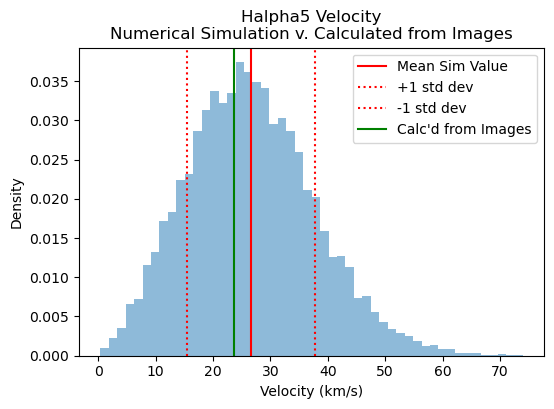

In [23]:
vel_mean = vel.mean()
vel_std = vel.std()

fig, ax = plt.subplots(figsize=(6,4))
zz = ax.hist(vel, bins=50, alpha=0.5, density=True)
ax.axvline(vel_mean, color='red', label='Mean Sim Value')
ax.axvline(vel_mean+vel_std, color='red', ls=':', label='+1 std dev')
ax.axvline(vel_mean-vel_std, color='red', ls=':', label='-1 std dev')

ax.axvline(img_vel, color='green', label='Calc\'d from Images')

ax.legend()
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Density')
# ax.set_ylim(0,0.2)
qq=ax.set_title('Halpha5 Velocity\nNumerical Simulation v. Calculated from Images')

In [26]:
np.random.seed(1234)
N=10000

#assuming 0.5 pixel error for JWST, 0.25 for HST

v_errors = []
for r in mc:

    x_e = np.random.normal(loc=0, scale=0.5, size=N)
    y_e = np.random.normal(loc=0, scale=0.5, size=N)
    x_2_e = np.random.normal(loc=0, scale=0.25, size=N)
    y_2_e = np.random.normal(loc=0, scale = 0.25, size=N)
    plx_e = np.random.normal(loc=0, scale = mean_parallax_error, size=N)

    v_err = calc_velocity(wcs_jwst, r['x']+x_e, r['y']+y_e,
                wcs_hst, r['x_2']+x_2_e, r['y_2']+y_2_e, (mean_parallax+plx_e)*u.mas, delta_t).std()
    
    v_errors.append(v_err)

summary_table['Vel Err'] = v_errors*u.km/u.second
summary_table['Vel Err'].info.format = '4.2f'

In [27]:
(mean_parallax+plx_e <=0).sum()

0

In [28]:
BDs = ['BD1','BD2', 'BD3', 'Halpha5']
summary_table.loc[BDs]

objid,RA(2024),Dec(2024),RA(2009),Dec(2009),PM,Separation,Distance,PosAngle,Velocity,Vel Err
,,,,,mas / yr,arcsec,pc,deg,km / s,km / s
str8,str11,str11,str11,str11,float64,float64,float64,float64,float64,float64
BD1,5:46:09.945,-0:10:11.00,5:46:09.929,-0:10:10.96,16.668787857136092,0.24036483569357558,399.99999999999994,99.71122715860297,31.607158599862785,5.01
BD2,5:46:12.233,-0:10:55.32,5:46:12.202,-0:10:55.27,32.78753735070092,0.47279808799799866,399.99999999999994,95.9344861101809,62.17134095319767,7.84
BD3,5:46:13.333,-0:10:36.95,5:46:13.326,-0:10:36.81,12.002899406572112,0.17308246816951897,399.99999999999994,143.90996095004755,22.759756045446824,4.41
Halpha5,5:46:13.583,-0:10:34.61,5:46:13.573,-0:10:34.50,12.443796126822734,0.1794402230722252,399.99999999999994,125.79003299749623,23.595779197373542,4.43


In [50]:
summary_table.write('/home/kevin/Documents/HH24/matchcat/objvelocity.xml', format='votable', overwrite=True)

In [29]:
def est_err(r,  mean_parallax, mean_parallax_error, delta_t,JWST_err=0.25, HST_err=1.0, N=10000):

    x_e = np.random.normal(loc=0, scale=JWST_err, size=N)
    y_e = np.random.normal(loc=0, scale=JWST_err, size=N)
    x_2_e = np.random.normal(loc=0, scale=HST_err, size=N)
    y_2_e = np.random.normal(loc=0, scale = HST_err, size=N)
    plx_e = np.random.normal(loc=0, scale = mean_parallax_error, size=N)

    v_err = calc_velocity(wcs_jwst, r['x']+x_e, r['y']+y_e,
                wcs_hst, r['x_2']+x_2_e, r['y_2']+y_2_e, (mean_parallax+plx_e)*u.mas, delta_t).std()
    return v_err
    

In [47]:
estimated_error = []
hst_prec = [1.0, 0.5, 0.25]
for bd in BDs:
    estimated_error.append([ bd, summary_table.loc[bd]['Velocity']]+\
                          [est_err(mc.loc[bd], mean_parallax, mean_parallax_error, delta_t, JWST_err=0.5, HST_err=h) for h in hst_prec])
estimated_error

tbl = Table(names=['objid','Velocity', 'HST1.0', 'HST0.5', 'HST0.25'],
            dtype = ['str', 'f8', 'f8', 'f8', 'f8'])

for r in estimated_error:
    tbl.add_row(r)

for c in ['Velocity', 'HST1.0', 'HST0.5', 'HST0.25']:
    tbl[c].info.format='3.2f'
    tbl[c].info.unit = u.km/u.s


In [48]:
tbl

objid,Velocity,HST1.0,HST0.5,HST0.25
,km / s,km / s,km / s,km / s
str7,float64,float64,float64,float64
BD1,31.61,11.96,7.18,5.00
BD2,62.17,13.63,9.19,7.70
BD3,22.76,11.11,6.63,4.37
Halpha5,23.60,11.20,6.74,4.50


## Other Stuff

In [32]:
summary_table['PosAngle'].value

array([317.82979513, 329.89729629, 329.88257168, 281.03850747,
       117.98312693, 234.26717652, 318.28740046, 136.16272477,
       297.17819305,  84.41358924, 209.78661426, 342.11258733,
       328.34308401, 100.06510564, 325.3862818 ,  95.77899476,
       320.32913837, 140.24707153,  60.6682605 ,  99.71122716,
        78.34341348,  18.24847607, 226.6316586 , 332.66043129,
       269.36802256, 206.61947054,  95.93448611, 315.43971409,
       296.33471192,  13.28304231, 140.09506485, 143.90996095,
       125.790033  , 265.34184421])

In [33]:
summary_table['PosAngle']

317.8297951331548
329.89729628766304
329.8825716828173
281.038507470614
117.98312693099271
234.26717652375223
318.2874004568038
136.16272477142238
297.17819304853344
84.4135892372582
209.78661425779697


In [34]:
Shock = ['HH 19','HH 20','HH 21','HH 21east','HH 27','HH 37','HH 70','HH 24 NNW','HH 24 SSE','HH 24 SSE2e','HH 24 SSE2w']

# α2000δ2000Assoc. JetSourcePASep. (″)Length (pc)b
ra2000 = ['5:45:49.6','5:45:55.6','5:45:55.7','5:45:59.8','5:46:22.9','5:45:56.0','5:46:02.3','5:45:51.3','5:46:28.6','5:46:35.3','5:46:31.0']

dec2000 = ['-00:05:11','-00:02:47','-00:04:27','-00:04:46','-00:13:44','-00:05:32','-00:05:36', '00:01:41', '-00:17:53','-00:22:47','-00:23:04']

jet = ['Jet J','Jet C','Jet C','Jet C','Jet J','Jet C','Jet C','Jet C','Jet E','Jet E','Jet E']

source = ['Wb','Ea','Ea','Ea','Wb','Ea','Ea','Ea','Ea','Ea','Ea']

pa=[317,336,330,338,135,325,341,340,147,152,157]

separation = [398,477,387,343,319,330,283,750,503,863,851]

length=[0.77,0.92,0.75,0.67,0.62,0.64,0.55,1.45,0.98,1.67,1.65]

Table6=Table({'ra2000':ra2000, 'dec2000':dec2000, 'jet':jet, 'source':source, 'pa':pa, 'separation':separation,'length':length})

Table6

ra2000,dec2000,jet,source,pa,separation,length
str9,str9,str5,str2,int64,int64,float64
5:45:49.6,-00:05:11,Jet J,Wb,317,398,0.77
5:45:55.6,-00:02:47,Jet C,Ea,336,477,0.92
5:45:55.7,-00:04:27,Jet C,Ea,330,387,0.75
5:45:59.8,-00:04:46,Jet C,Ea,338,343,0.67
5:46:22.9,-00:13:44,Jet J,Wb,135,319,0.62
5:45:56.0,-00:05:32,Jet C,Ea,325,330,0.64
5:46:02.3,-00:05:36,Jet C,Ea,341,283,0.55
5:45:51.3,00:01:41,Jet C,Ea,340,750,1.45
5:46:28.6,-00:17:53,Jet E,Ea,147,503,0.98


In [35]:
#Halpha5 is Gaia DR3 3219117536412592000

parallax = 3.8567315506214412 #mas
parallax_e = 0.57923716

pmra = 11.175782742177075 # mas/year
pmra_error = 0.5604591

pmdec = -7.949136598772929 # mas/year
pmdec_error = 0.47556072

pmgaia = 13.714478 #mas/year, reported by Gaia, looks to be pm's in quadrature

pm = np.sqrt(pmra**2+pmdec**2) * (u.mas/u.year)
dist = (1000/parallax)*u.pc

pm.to(u.radian/u.second)*(dist.to(u.km)/u.radian)

<Quantity 16.85703933 km / s>

In [36]:
def pm2kms(parallax, pmra, pmdec):
    
    pm = np.sqrt(pmra**2+pmdec**2) * (u.mas/u.year)
    dist = (1000/parallax)*u.pc

    kms = pm.to(u.radian/u.second)*(dist.to(u.km)/u.radian)
    
    return kms

In [37]:
N = 10000
np.random.seed(1234)
s_parallax = np.random.normal(loc=parallax, scale=parallax_e, size=N)
s_pmra = np.random.normal(loc=pmra, scale=pmra_error, size=N)
s_pmdec = np.random.normal(loc=pmdec, scale=pmdec_error, size=N)

s_kms = pm2kms(s_parallax, s_pmra, s_pmdec)

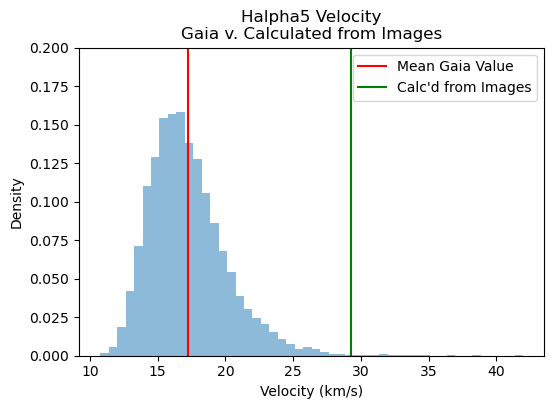

In [38]:
Halpha5kms = 29.2415 
fig, ax = plt.subplots(figsize=(6,4))
zz = ax.hist(s_kms.value, bins=50, alpha=0.5, density=True)
ax.axvline(s_kms.value.mean(), color='red', label='Mean Gaia Value')
ax.axvline(Halpha5kms, color='green', label='Calc\'d from Images')

ax.legend()
ax.set_xlabel('Velocity (km/s)')
ax.set_ylabel('Density')
ax.set_ylim(0,0.2)
qq=ax.set_title('Halpha5 Velocity\nGaia v. Calculated from Images')

### Table 9 Validation

In [39]:
import numpy as np
import astropy.units as u

pmL1630= np.array([-0.519, -0.741])
Table9Stars = Table(names=['star', 'parallax', 'pmra', 'pmdec'],
                    rows=[
    ['Halpha1', 1.1291189,  -0.711, -0.556],
    ['Halpha2', 2.0616781739749666, 1.175, -0.048],
    ['Halpha3', 3.161310577886153, 0.544, -0.392],
    ['Halpha4', 2.5633221914251982, -3.438, -3.094],
    ['Halpha5', 3.8567315506214412, 11.176, -7.949]
])

In [40]:
Table9Stars

star,parallax,pmra,pmdec
str7,float64,float64,float64
Halpha1,1.1291189,-0.711,-0.556
Halpha2,2.0616781739749666,1.175,-0.048
Halpha3,3.161310577886153,0.544,-0.392
Halpha4,2.5633221914251982,-3.438,-3.094
Halpha5,3.8567315506214412,11.176,-7.949


In [41]:
#position angle adjusted for motion of L1630
rad = np.pi/2 - np.arctan2(Table9Stars['pmdec']-pmL1630[1], Table9Stars['pmra']-pmL1630[0])
np.degrees(np.remainder(2*np.pi+rad, 2*np.pi))

313.9362748661086
67.75097634278767
71.82415977594185
231.12778282286115
121.64684716898586


In [42]:
pm2kms(Table9Stars['parallax'], Table9Stars['pmra'], Table9Stars['pmdec'])

<Quantity [ 3.78938878,  2.70396156,  1.0054661 ,  8.55363758, 16.85715962] km / s>

In [43]:
pm2kms(Table9Stars['parallax'], Table9Stars['pmra']-pmL1630[0], Table9Stars['pmdec']-pmL1630[1])

<Quantity [ 1.11939399,  4.20838555,  1.67770867,  6.93373431, 16.88575702] km / s>

In [44]:
# vtan
pm2kms(2.5, Table9Stars['pmra']-pmL1630[0], Table9Stars['pmdec']-pmL1630[1])


<Quantity [ 0.50557156,  3.47053465,  2.12150327,  7.10935801, 26.04953274] km / s>

### Uncertainty Propagation

Let $v$ be the space velocity calculated from $PMRA$, $PMDEC$ and $PLX$ and their associated uncertainties as reported by Gaia DR3.
Then:
\begin{equation}
v = PM * dist
\end{equation}
where $PM$ is an approximation of the object's angular velocity and $dist$ is the object's distance from the Sun.. Let $A$ scale $PMRA$ and $PMDEC$ from $\frac{mas}{year}$ to $\frac{radian}{sec}$

\begin{align}
PM &= A\sqrt{PMRA^2 + PMDEC^2} \\
\\
\frac{\delta PM}{PM} &= A\sqrt{ \left(\frac{\partial {PM}} {\partial{PMRA}}\delta PMRA \right)^2 +\left(\frac{\partial {PM}} {\partial{PMDEC}}\delta PMDEC \right)^2 } \\
\\
\frac{\partial {PM}} {\partial{PMRA}} &= A \left(\frac{PMRA}{\sqrt{PMRA^2 + PMDEC^2}} \right) \\
\\
\frac{\partial {PM}} {\partial{PMDEC}} &= A \left(\frac{PMDEC}{\sqrt{PMRA^2 + PMDEC^2}} \right)
\end{align}

Distance in parsec is $\frac{1000}{PLX}$ and scale such that $dist$ comes out in kilometers, then:
\begin{align}
dist &= \frac{B}{PLX}\\
\delta dist &= B \Big|\frac{d}{d\ PLX} dist\Big | \delta PLX\\
\frac{d}{d\ PLX} dist &= \frac{-B}{PLX^2} \\
\delta dist &= B \Big|\frac{-B}{PLX^2}\Big | \delta PLX
\end{align}